In [1]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx

# let's not show the matplotlib deprecation warnings
import warnings
warnings.filterwarnings('ignore')

## The Erdos-Renyi random graph model

### Social Networks  - Fall 2025

So far, we've discussed several different ways to measure network connectivity. This week, we're going to take our first look at a theoretical model of a network: the [Erdos-Renyi random graph model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). This model is sometimes also called the ER model. 

(Note: technically, there are a few different versions of the ER model, but they are qualitatively very similar to each other. We're not going to dwell on all of the different versions here.)

One way to think about the ER model is that it is a recipe that describes how networks can be generated. 

The ER model has two parameters

* $n$ - the number of nodes in the network
* $p$ - for each pair of nodes, the probability that those nodes are connected by an edge

You can think of the parameter $p$ as being a single number from $0$ to $1$ that controls the level of connectedness of the network. 

* when $p=0$, the network is not connected at all
* when $p=1$, the network is completely connected (all possible edges exist).

We are usually interested in $0 \lt p \lt 1$, ie, intermediate values of $p$.

To generate an ER graph for particular parameter values $n$ and $p$,
you could follow this algorithm:

    for each pair of vertices u and v:
        flip a coin that shows heads with probability p
        if the coin is heads:
            add the edge (u,v) to the network
        if the coin is tails:
            do nothing
  


[LIVE DEMONSTRATION OF ER ALGORITHM]

One way to understand the behavior of the ER model is to analyze it mathematically; in fact, this is what Erdos and Renyi originally did. It turns out that this simple model has some rich and interesting behavior.

In this class, we're going to study the ER model by using simulation; in other words, we're going to use the computer to create lots of different random networks in order to try to better understand the ER model. Simulation can be a powerful tool for answering all sorts of questions about network models.

### Investigating variation with fixed parameters

The ER model is *stochastic*; in other words, it describes a process that has some randomness. If we pick a particular value for $n$ and $p$ and use the ER model to create a network, we do not know for certain exactly which network we will get.

Let's illustrate this with a very simple example, $n = 2$.  
In this case, there are only two possible networks:  
Network A, which has no edges, and Network B, which has one edge (see below).

<img src="twonode_networks.png" height=80% width=80%>

How likely is it that an ER model with $n=2$ will produce Network A as opposed to Network B? That depends on the parameter $p$.

Let's run the next code cell a few times to convince yourself that the `erdos_renyi_graph` function can produce different results, even if the values of $n$ and $p$ do not change.

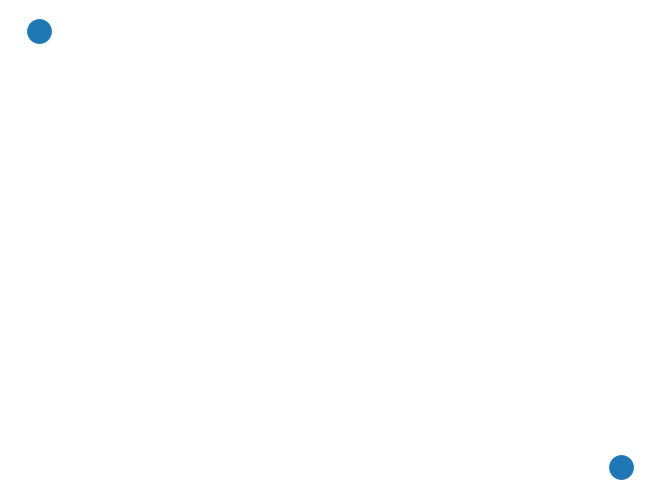

In [2]:
g = nx.erdos_renyi_graph(n=2, p=.1)
nx.draw(g)

Playing with the code cell illustrates that the model has randomness in it.  For the rest of the notebook, we're going to study the output of the ER model to try and learn about systematic patterns that emerge in random ER results.

**Question** Imagine that you generated 1000 networks using the ER model with $n=2$ nodes and edge probability $p=0.1$.  

(In other words, imagine that you ran the code cell above 1000 times.)  

Try to predict the approximate fraction of the time you expect an edge to be included. In other words, how many out of those 1000 draws do you think will be Network B?  
Why did you predict this number?

The next code cell actually simulates 1,000 ER networks with $n=2$ and $p=0.1$.

In [3]:
num_sims = 1000

num_edges = make_array()

for i in range(num_sims):
    sim_network = nx.erdos_renyi_graph(n=2, p=.1)
    num_edges = np.append(num_edges, sim_network.number_of_edges())

print("Number of times an edge was included: ", np.sum(num_edges))    
print("Fraction of the time an edge was included: ", np.mean(num_edges))

Number of times an edge was included:  99.0
Fraction of the time an edge was included:  0.099


**Question** How close was the result from the simulation to the number you predicted?  

**Question** Can you think of any way that to make the result from the simulation closer to the number you predicted?

### Average degree with fixed parameters

OK, so we see that when we generate networks using the ER model, there will be some random variation even when $n$ and $p$ are fixed. Now we will see how much variation there is in the degrees of nodes in an ER networks when $n$ and $p$ are fixed.

First, we're going to write a function that will save us some time later.

Look at the following function and then look at the example of how to use it.

In [4]:
def get_degrees(net):
    """
    Given a networkx network object, return a Table that has the
    degrees of all of the nodes in the network in a column called 'degree'
    """
    net_degrees = dict(net.degree()).values()
    return(Table().with_column('degree', net_degrees))

In [5]:
## example usage
sim_network = nx.erdos_renyi_graph(n=100, p=.1)
degs = get_degrees(sim_network)
degs

degree
8
12
10
4
8
7
11
13
12
12


The `get_degrees` function extracts the degrees of all of the nodes in a network and puts them in a Table. We can then make a histogram of the degrees.

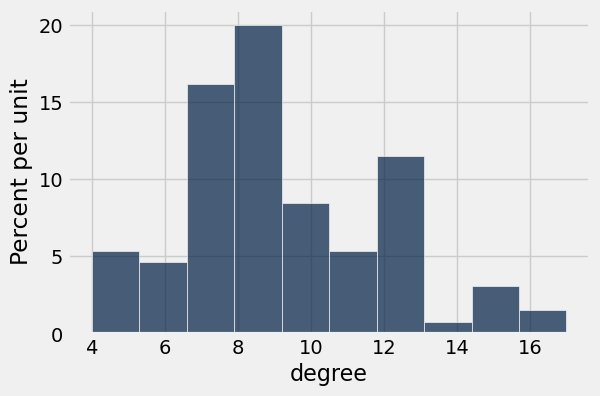

In [6]:
degs.hist('degree')

Now that we can easily make a histogram of a the degrees of a network's nodes, let us look at the degrees of a few ER networks generated with $n=1000$ and $p=0.1$.

The code below prints out the degrees of nodes in 5 ER networks with $n=1000$ and $p=0.1$.

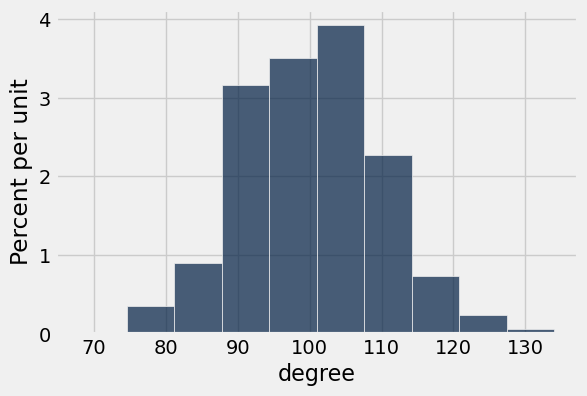

<Figure size 640x480 with 0 Axes>

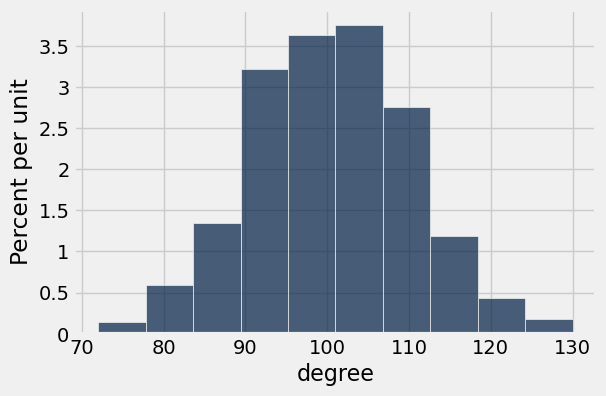

<Figure size 640x480 with 0 Axes>

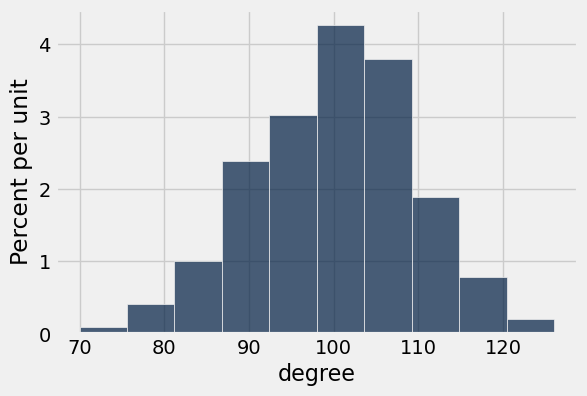

<Figure size 640x480 with 0 Axes>

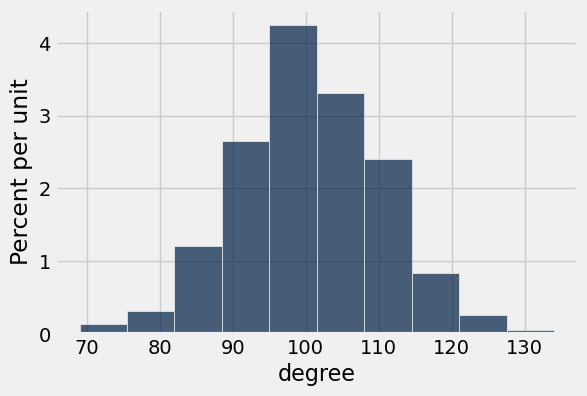

<Figure size 640x480 with 0 Axes>

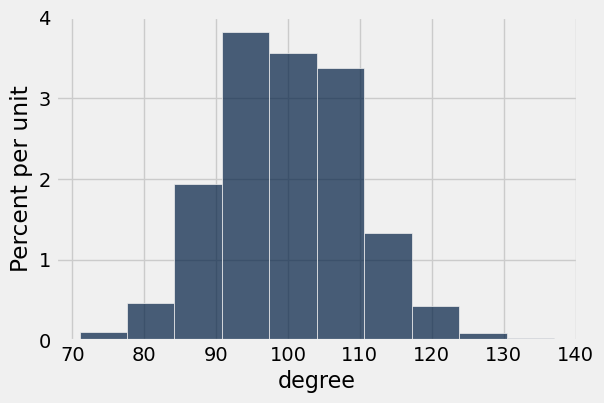

<Figure size 640x480 with 0 Axes>

In [7]:
num_sims = 5
g_n = 1000
g_p = 0.1

for i in range(num_sims):
    sim_network = nx.erdos_renyi_graph(n=g_n, p=g_p)
    sim_network_degrees = get_degrees(sim_network) # using the function we wrote above
    plt.figure(sim_network_degrees.hist('degree'))

Hopefully, we can see in the histograms above that the results are random, but that they are not completely haphazard

In fact, you can prove that the degree histogram, though random, has a characteristic shape called a *Poisson distribution*. 

Proving this fact goes beyond the scope of our class, but the important thing to understand is that when parameters are fixed, specific ER networks are random, but there is actually quite a bit of structure to the randomness.

We're going to illustrate one final point about using simulations to study ER networks with fixed $n$ and $p$.  

Recall that the **average degree** of a network is the average number of connections across all of the nodes in a network.

So far, we've talked about the average degree of a specific network.

We can extend this notion to the ER model and ask what would happen if we

* generated a large number (say $M = 1,000,000$) of ER random graphs, all with the same parameters $p$ and $n$
* calculated the average degree of each of the $M$ random graphs $\bar{d}_1, \dots, \bar{d}_M$
* calculated the average of those average degrees $\bar{d} = \frac{1}{M} \left[ \bar{d}_1 + \dots + \bar{d}_M \right]$

**Question** How would you interpret the quantity $\bar{d}$?

**Question** In terms of the parameters $p$ and $n$, what do you think the value of $\bar{d}$ will be?

Although the average degree of a specific network generated from the ER model is a random quantity, one can prove that it will be close to the value 

$$\bar{d} = (n-1)p$$

where $\bar{d}$ is the average degree. 

Roughly, you can see why this is true by thinking about a typical node in the network. Each node has a possible connection to $n-1$ other nodes, and each of those possible connections will get placed in the network with probability $p$.

So, for a network with $n=100$ nodes and $p=0.1$, the average degree $\bar{d}$ should be close to $99 \times 0.1 = 9.9$.

The helpful thing about simulations is that we can estimate quantities like $\bar{d}$ even if we haven't been able to derive a formula for them. How? We can 

1. generate many ER networks using the fixed parameters $p$ and $n$
2. calculate whatever we are interested in for each of the generated networks
3. average the calculated quantites across all of the generated networks

It turns out that this approach can be used to estimate many quantities. We'll see a demonstration of this now.

First, we'll define a quick function that will help us calculate the average degree of a given network:

In [8]:
def avg_degree(net):
    """
    Calculate the average degree for a networkx network
    """
    return(2.0*net.number_of_edges()/net.number_of_nodes())

And then we'll run a simulation to estimate the average degree for ER networks with $n = 100$ and $p=0.1$. 

**Question** What would we expect the average degree for ER networks with $n=100$ and $p=0.1$ to be? (Use the formula we just introduced.)

Answer: (100-1)*0.1 = 9.9

Let's run the following simulation a few times and note how close the estimate is to the value from the formula.

In [9]:
num_sims = 100
g_n = 100
g_p = 0.1
avg_degree_results = make_array()

for i in range(num_sims):
    sim_network = nx.erdos_renyi_graph(n=g_n, p=g_p)
    sim_network_avg_degree = avg_degree(sim_network) # using the function we wrote above
    avg_degree_results = np.append(avg_degree_results, sim_network_avg_degree)
    
print("Estimated average degree: ", np.mean(avg_degree_results))

Estimated average degree:  9.886000000000001


**Question** So our estimate was not exactly right. How can we make our simulation-based estimate more accurate?

Answer: We can simply increase the number of simulations that we run. So let's copy the code above to the cell below, and then change `num_sims` to produce a more accurate estimate.

In [10]:
# this takes a few seconds to run
num_sims = 10000
g_n = 100
g_p = 0.1
avg_degree_results = make_array()

for i in range(num_sims):
    sim_network = nx.erdos_renyi_graph(n=g_n, p=g_p)
    sim_network_avg_degree = avg_degree(sim_network) # using the function we wrote above
    avg_degree_results = np.append(avg_degree_results, sim_network_avg_degree)
    
print("Estimated average degree: ", np.mean(avg_degree_results))

Estimated average degree:  9.895522


Here are some general conclusions to think about from this part of the lecture:

* Even for fixed parameter values, the ER model generates networks randomly, i.e., it does not produce the same network every time
* ER networks are random, but there is still a lot of structure to them -- in other words, the range of possible networks the ER model can produce is relatively narrow when compared to all possible networks.
* We can estimate some properties of ER networks by using simulation, and the more simulations we conduct, the more accurate our estimates will be

### Investigating variation across different values of $p$

In order to understand more about connectivity of networks generated by the ER model, we will investigate how the average degree of nodes in the network changes as the connectivity parameter $p$ changes.

First, let's make some specific predictions. 

**Question** If a network has 100 nodes, what do you expect the average degree of nodes in the network to be when $p=0$?

**Question** If a network has 100 nodes, what do you expect the average degree of nodes in the network to be when $p=1$?

Answer: 
- When $p=0$, there are no edges in the network, so the average degree is 0.
- When $p=1$, every possible edge is in the network; here, since $n=100$, that means the average degree is 99.

**Question** How do you think the average degree will change in ER networks with $n=100$ as $p$ varies starting from $0$, then increasing until $p=1$? 

For example, do you think that the average degree will increase, decrease, or not change? If you think that the average degree will change, can you say anything about the shape (eg, will it be a straight line? parabola? exponential curve?)


Answer: Lots of predictions are possible, but a reasonable prediction might say that the average degree should increase gradually from 0 (when $p=0$) to 99 (when $p=1$).


Now let's use simulation to try and get an understanding of how the average degree changes as the parameter $p$ does.

In [11]:
n = 100
p_vals = np.arange(0, 1, .1)
avg_degree_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    sim_network_avg_degree = avg_degree(sim_network) # using the function we wrote above
    avg_degree_results = np.append(avg_degree_results, sim_network_avg_degree)
    
results = Table().with_columns([
        'p', p_vals,
        'avg_degree', avg_degree_results
    ])
results

p,avg_degree
0,0
0.1,9.44
0.2,19.86
0.3,30.16
0.4,39.26
0.5,49.24
0.6,59.84
0.7,69.26
0.8,77.34
0.9,89.5


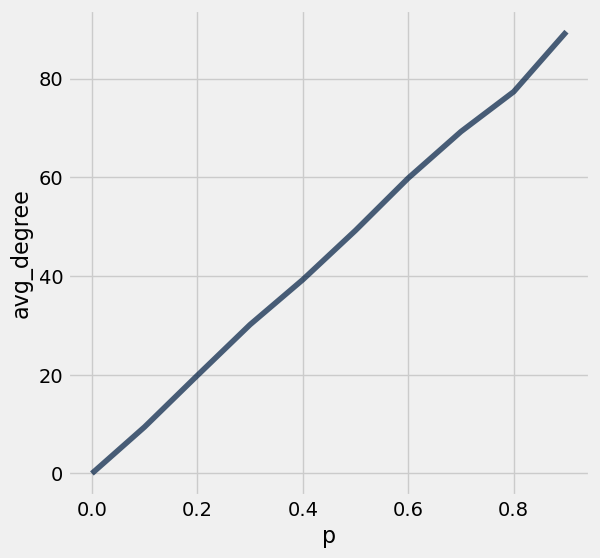

In [12]:
results.plot('p', 'avg_degree')

**Question** How would you describe the way that the average degree changes as $p$ does?

Now let's change the simulation so that there are fewer nodes in the network; we will

* change the network size parameter instead of $n=100$, we'll consider a smaller network with $n=10$
* examine what happens to the average degree as $p$ goes from 0 to 1 (like we did before)

**Question** Do you think this will change the relationship we observe between $p$ and the average degree? If so, how?

Answer: a reasonable prediction might be that the range of average degrees will only go from 0 to 9 now, but otherwise the increase from 0 to 9 over the range $p=0$ to $p=1$ should have the same shape.

In [13]:
n = 10
p_vals = np.arange(0, 1, .1)
avg_degree_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    sim_network_avg_degree = avg_degree(sim_network) # using the function we wrote above
    avg_degree_results = np.append(avg_degree_results, sim_network_avg_degree)
    
results_smalln = Table().with_columns([
        'p', p_vals,
        'avg_degree', avg_degree_results
    ])

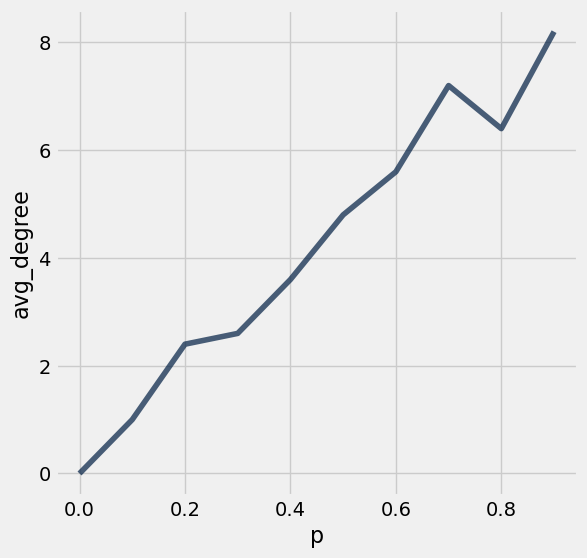

In [14]:
results_smalln.plot('p', 'avg_degree') # can compare to results to see what we got before

**Question** What do you see here? How does it differ from the simulation where $n=100$? Can you think of some way to explain any differences between them?

### Parameterizing by the average degree

The direct relationship between the average degree, $\bar{d}$ and $p$ is not an accident: the two quantities are linked together by the relationship

$$\bar{d} = p (n-1).$$



We can use this fact to parameterize an ER random network in terms of $n$ and $\bar{d}$ since picking those two values is exactly the same as picking $n$ and $p$.

Why? If we pick $n$ and $\bar{d}$, then we have implicitly picked $p$ because $p = \frac{\bar{d}}{n-1}$.

We can write a function to enable us to generate ER networks using this alternate parameterization:

In [15]:
def gen_er_by_avg_degree(n, dbar):
    return(nx.erdos_renyi_graph(n=n, p=dbar/(n-1)))

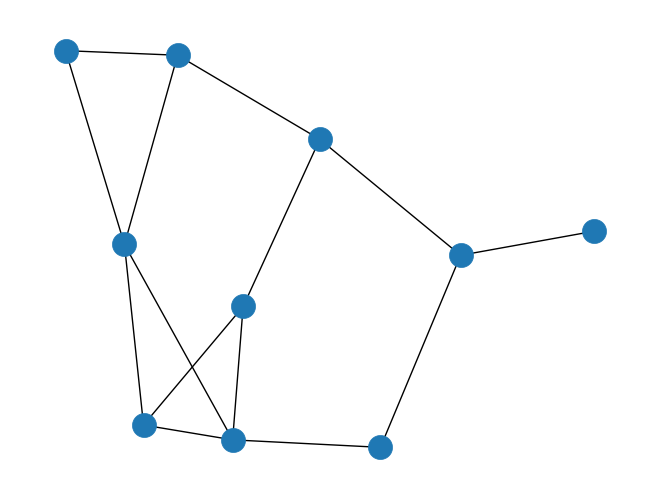

In [16]:
nx.draw(gen_er_by_avg_degree(10, 2))

### Clustering coefficient

Now we will explore another aspect of network connectivity: how densely interconnected nodes' neighbors tend to be. 

We can capture this with the **clustering coefficient**. We define this clustering coefficient to be the probability that two randomly selected friends of the node are friends with each other.

Equivalently, the clustering coefficient is the fraction of pairs of a node’s friends that are connected to each other.



**Question** What will the clustering coefficient be if $n=100$ and $p=0$?

**Question** What will the clustering coefficient be if $n=100$ and $p=1$?

**Question** How do you expect the clustering coefficient to change as $p$ is varied from smaller to larger values? What shape do you think this change will take?

We can investigate what happens to the clustering coefficient empirically by using a simulation where we fix $n$ and vary $p$ from 0 to 1:

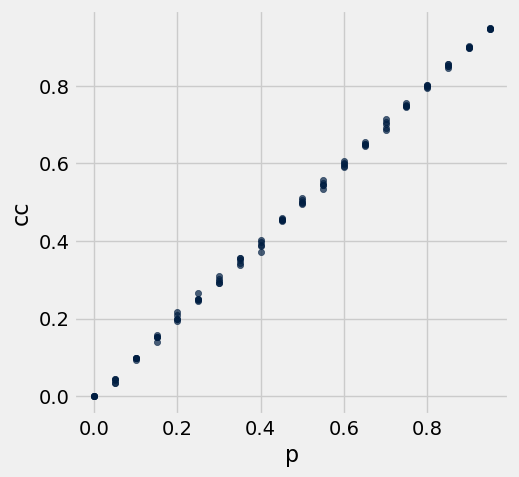

In [17]:
# this takes ~ 4 seconds
n = 100
num_repetitions = 5
p_vals = np.repeat(np.arange(0, 1, .05), num_repetitions)
cc_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    cc_results = np.append(cc_results, 
                           # nx.average_clustering calculates the clustering coefficient
                           nx.average_clustering(sim_network))
    
results_cc = Table().with_columns([
        'p', p_vals,
        'cc', cc_results
    ])

results_cc.scatter('p', 'cc')

Let's investigate the clustering coefficient in a different way.

**Question** In a real-world social network, what do you think will tend to happen to the clustering coefficient as the number of nodes in the network gets bigger and bigger?

It's hard to say for sure, but one reasonable perspective is that clustering coefficient doesn't decrease as quickly as the number of nodes increases.

So let's ask what happens in an ER random network when we fix the average degree, but increase $n$, the network size.

**Question** What will the clustering coefficient be if $\bar{d} = 10$ and $n=11$?

**Question** What will the clustering coefficient be if $\bar{d} = 10$ and $n=1000$?

**Question** How do you expect the clustering coefficient to change as $n$ is varied from smaller to larger values while $\bar{d}$ is fixed? What shape do you think this change will take?

Let's investigate with a simulation:

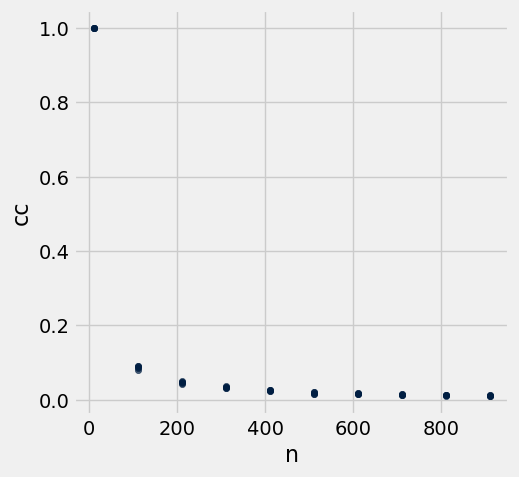

In [18]:
# this takes ~4 seconds
num_repetitions = 5
n_vals = np.repeat(np.arange(11, 1000, 100), num_repetitions)
dbar = 10
cc_results = make_array()

for current_n in n_vals:
    sim_network = gen_er_by_avg_degree(n=current_n, dbar=dbar)
    cc_results = np.append(cc_results, nx.average_clustering(sim_network))
    
results_cc = Table().with_columns([
        'n', n_vals,
        'cc', cc_results
    ])
results_cc.scatter('n', 'cc')

Looking at our expression for $\bar{d}$, and remembering that the clustering coefficient in an ER random network is equal to $p$, we can make sense of this relationship:

$$
\begin{align}
\bar{d} &= (n-1)~p\\
\Longleftrightarrow p &= \frac{\bar{d}}{n-1}
\end{align}
$$

... so, when we fix $\bar{d}$ and change $n$, then $p$ changes like $\frac{1}{n-1}$.

### Giant components

Now we will explore another aspect of network connectivity: how many 'pieces' or components there are in the network. 

Remember that a relatively un-connected network has many different components (we called them 'islands'); a relatively connected network, on the other hand, has a **giant component** which contains most of the network's nodes.

We'll make use of a simple function `get_biggest_component`, which will give us the biggest component in a network.

In [19]:
def get_biggest_component(network):
    biggest = max(nx.connected_components(network), key=len)
    biggest_subgraph = network.subgraph(biggest).copy()
    return(biggest_subgraph)

We'll also add another function, `frac_nodes_in_biggest_component`, which takes a network and returns the proportion of nodes in the network that are in the biggest of the components. This quantity is an indicator of connectedness: when all of the networks nodes are part of the same giant component, then this function will return 1; on the other hand, if the network is made up of many small, separate components then this function will return a number very close to 0.

In [20]:
def frac_nodes_in_biggest_component(net):
    gc = get_biggest_component(net)
    return(gc.number_of_nodes() / net.number_of_nodes())

Let's try to understand how the fraction of nodes in the biggest component changes when the parameters of an ER network change.

**Question** What fraction of nodes will be in the biggest component when $p=0$?

**Question** What fraction of nodes will be in the biggest component when $p=1$?

**Question** How do you expect the fraction of nodes in the biggest component to change as $p$ is varied from smaller to larger values? What shape do you think this change will take?

Now we'll use a simulation to study this question empirically. Note that there is a new feature in this simulation: each parameter set (i.e., value of $n$ and $p$) is repeated more than once. This is accomplished using `num_repetitions` and `np.repeat`. 

Repeating the parameter set multiple times gives us a way to account for the fact that there is randomness to the ER networks that get generated. This will be clearer once we plot the results of the simulation below.

In [21]:
n = 100
num_repetitions = 5
p_vals = np.repeat(np.arange(0, 0.2, .01), num_repetitions)
num_component_results = make_array()
gc_frac_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    sim_network_num_components = nx.number_connected_components(sim_network)
    sim_network_gc_frac = frac_nodes_in_biggest_component(sim_network)
    num_component_results = np.append(num_component_results, sim_network_num_components)
    gc_frac_results = np.append(gc_frac_results, sim_network_gc_frac)
    
results = Table().with_columns([
        'p', p_vals,
        'num_components', num_component_results,
        'gc_frac', gc_frac_results
    ])

Let's visualize the results of the simulation with two scatter plots:

scatter plot that compares $p$ (on the x axis) to the number of components in the network (y axis)

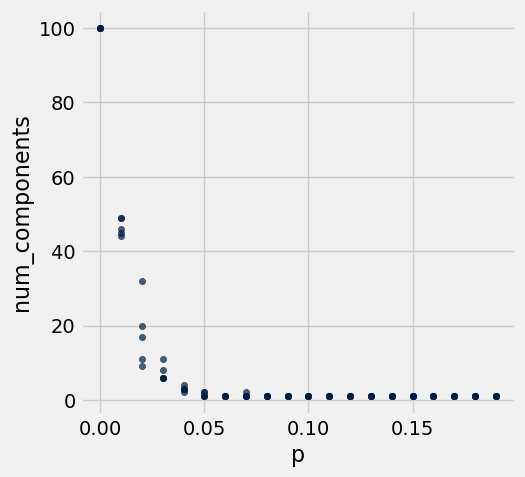

In [22]:
results.scatter('p', 'num_components')

scatter plot that compares $p$ (on the x axis) to the fraction of nodes in the giant component (x axis)

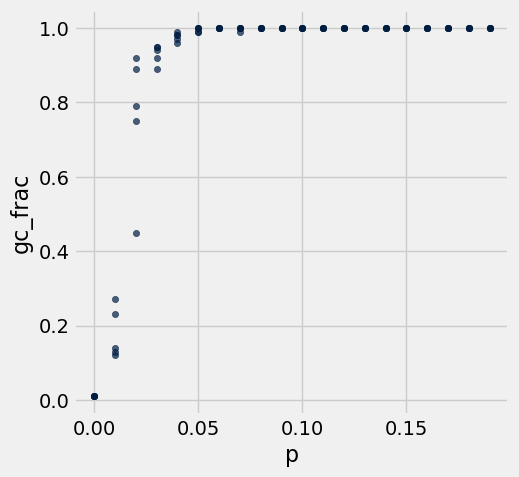

In [23]:
results.scatter('p', 'gc_frac')

There are a couple of interesting things to notice about these plots. We'll focus on the plot that has the fraction of nodes in the giant component on the y axis (but you can study the other plot in much the same way).

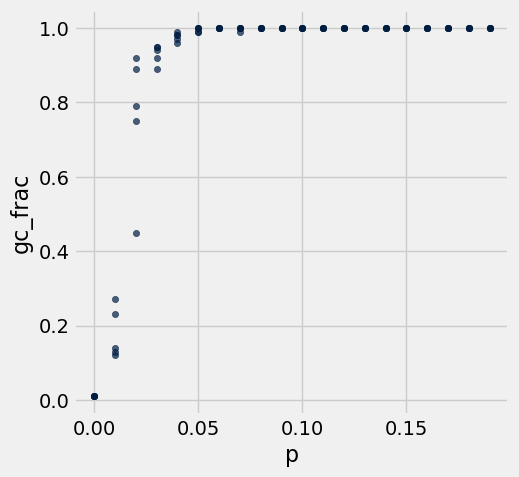

In [24]:
results.scatter('p', 'gc_frac')

First, you can tell that for some values of $p$, the result varies somewhat due to the randomness of the ER model. Given what we studied in the first part of the lecture, this is not surprising. But it is important to remember this fact whenever you conduct a simulation study.

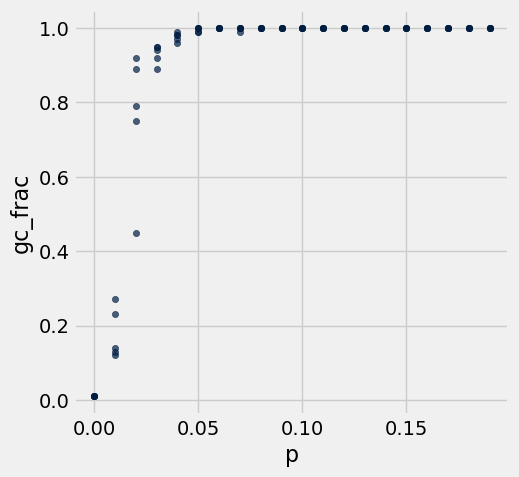

In [25]:
results.scatter('p', 'gc_frac')

Second, looking at the plot, as $p$ increases there seems to be a nonlinear change (i.e., a change that doesn't follow a straight line) from a regime where `gc_frac` is steadily increasing to a regime where it is fixed at its maximum value, 1. When `gc_frac` is 1, all of the nodes in the network are in the same component. So this result suggests that, when $p$ is big enough, an ER random network is very likely to be completely connected, i.e., made of one 'giant' component.

It would be interesting to understand where that transition point happens.

**Question** Can you conjecture at what point a giant component will be very likely to emerge in an ER network with parameters $p$ and $n$?

Let's try to answer this question empirically.

We'll start with the simulation code we just used, but we'll tweak the ranges of $p$ that get explored to try and narrow down exactly where the emergence of a single giant component happens. In other words, we'll try to find the value of $p$ above which the fraction of nodes in the giant component is equal to 1.

*[Hint: in addition to narrowing the range of $p$ values explored in the simulation, you may also want to make the distance between the different $p$ values narrower; in other words, you might want to make the third argument of `np.arange` smaller]*

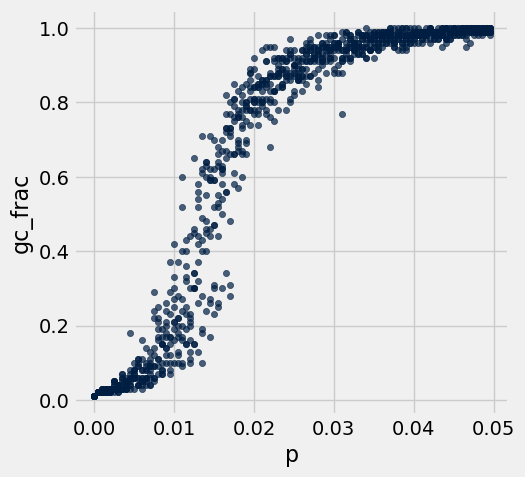

In [26]:
# this takes a few seconds
n = 100
num_repetitions = 10
p_vals = np.repeat(np.arange(0, 0.05, .0005), num_repetitions)
num_component_results = make_array()
gc_frac_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    sim_network_num_components = nx.number_connected_components(sim_network)
    sim_network_gc_frac = frac_nodes_in_biggest_component(sim_network)
    num_component_results = np.append(num_component_results, sim_network_num_components)
    gc_frac_results = np.append(gc_frac_results, sim_network_gc_frac)
    
results = Table().with_columns([
        'p', p_vals,
        'num_components', num_component_results,
        'gc_frac', gc_frac_results
    ])

results.scatter('p', 'gc_frac')

Let's repeat the simulation above, but now we'll calculate $\bar{d}$, the average degree as well as `gc_frac`.

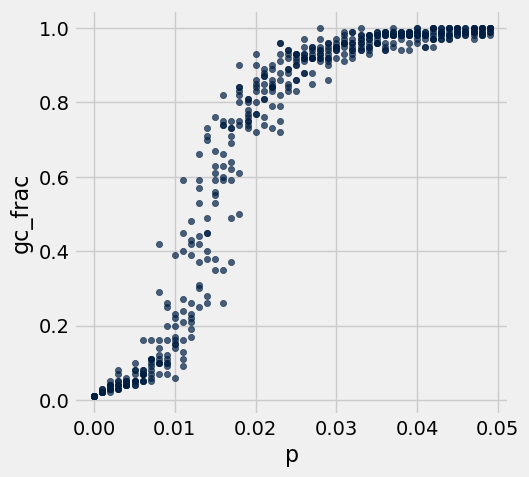

In [27]:
n = 100
num_repetitions = 10
p_vals = np.repeat(np.arange(0, 0.05, .001), num_repetitions)
num_component_results = make_array()
gc_frac_results = make_array()
avg_degree_results = make_array()

for current_p in p_vals:
    sim_network = nx.erdos_renyi_graph(n=n, p=current_p)
    sim_network_num_components = nx.number_connected_components(sim_network)
    sim_network_gc_frac = frac_nodes_in_biggest_component(sim_network)
    num_component_results = np.append(num_component_results, sim_network_num_components)
    gc_frac_results = np.append(gc_frac_results, sim_network_gc_frac)
    avg_degree_results = np.append(avg_degree_results, avg_degree(sim_network)) 
    
results = Table().with_columns([
        'p', p_vals,
        'num_components', num_component_results,
        'gc_frac', gc_frac_results,
        'avg_degree', avg_degree_results
    ])

results.scatter('p', 'gc_frac')

And let's investigate the relationship between $\bar{d}$ and `gc_frac`.

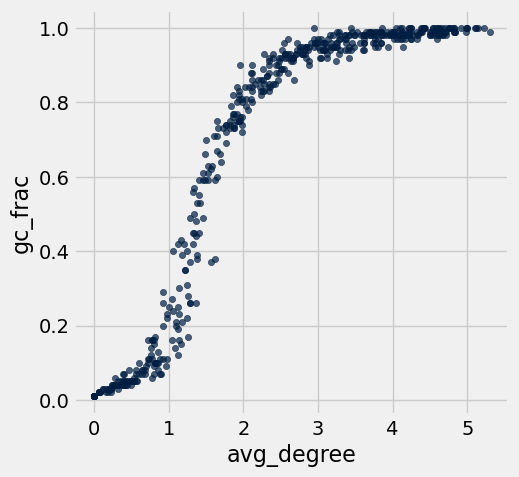

In [28]:
results.scatter('avg_degree', 'gc_frac')

**Question** Based on this simulation exploration, what is our best estimate for the value of $p$ where a giant component emerges? Can you think of any other way of estimating this value (apart from the simulation)?

Answer: p = 0.01 to 0.02; d_bar = 1 to 2

Now we'll look at the giant component in situations where we fix the average degree, but make the network bigger.

**Question** What would you predict will happen as n goes from smaller to bigger values when $\bar{d}$ is fixed?

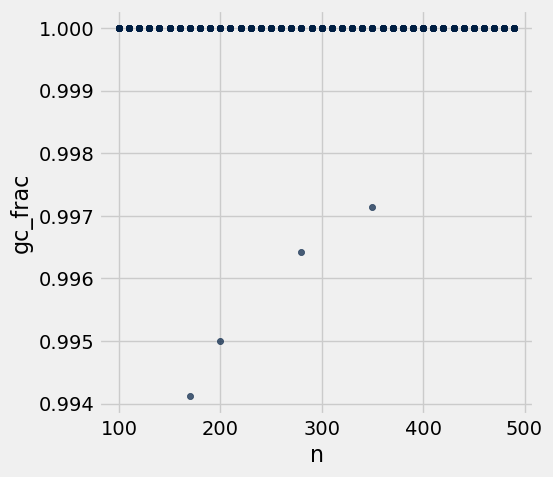

In [29]:
num_repetitions = 10
dbar = 10
n_vals = np.repeat(np.arange(100, 500, 10), num_repetitions)
gc_frac_results = make_array()

for current_n in n_vals:
    sim_network = gen_er_by_avg_degree(n=current_n, dbar=dbar)
    sim_network_gc_frac = frac_nodes_in_biggest_component(sim_network)
    gc_frac_results = np.append(gc_frac_results, sim_network_gc_frac)
    
    
results_gc_n = Table().with_columns([
        'n', n_vals,
        'gc_frac', gc_frac_results
    ])

results_gc_n.scatter('n', 'gc_frac')

What we find is that the fraction of nodes in the giant component depends on dbar, but not on n.

(If you change dbar to be closer to 1, the results will be noisier, so more simulations will be needed to see this clearly)

### Path lengths

One way to try to quantify the structure of a network is to examine the distance between the nodes in the network.

Q: How did we define the distance between two nodes?  

Q: Can we define the distance between *any* pair of nodes in a network?

Let's make a table of the distance between every pair of nodes in the giant component of this network:

  
<img src="example_network.png" style="width: 60%;">


<img src="example_network.png" style="width: 40%;">


For the nodes that are in the giant component, we get something like this:


|             |  node 1 | node 2 |  node 3 |  node 4 |
|   :----:    |  :---:  |  :---: |  :---:  |  :---:  |
|   node 1    |    -    |    2   |    1    |    2    |
|   node 2    |    2    |    -   |    1    |    2    |
|   node 3    |    1    |    1   |    -    |    1    |
|   node 4    |    2    |    2   |    1    |    -    |

We define the **average path length** to be the average of the path lengths between nodes. Here:


In [30]:
(2 + 1 + 2 + 1 + 2 + 1) / 6

1.5

Let's check our answer with code

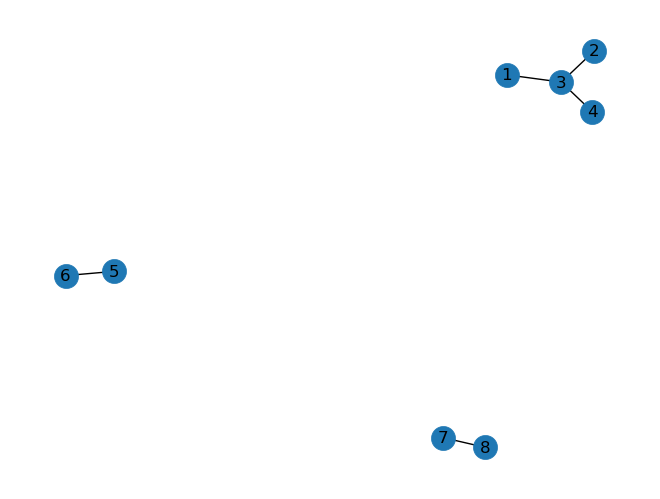

In [31]:
ex_network = nx.Graph([(1,3), (2,3), (3,4), (5,6), (7,8)])
nx.draw(ex_network, with_labels=True)

In [32]:
ex_largest_comp = get_biggest_component(ex_network)
nx.average_shortest_path_length(ex_largest_comp)

1.5

So, to summarize, the **average shortest path length** is defined for a particular connected component.  

We usually calculate the ASPL for the giant component in a social network.  

It answers the question: if you randomly picked two nodes (in the giant component), on average how far apart would they be?  

(Note that ASPL is conceptually related to the 'closeness centrality' measure we discussed in an earlier class.)

### Average shortest path length in ER networks

Now let's go back to the ER model.

**Question:** Fix $n=100$. What do you think the average shortest path length will be when the average degree is close to 1?

**Question:** Fix $n=100$. What do you think the average shortest path length will be when the average degree is close to 99?

**Question:** How do you think the shortest path length will change as the average degree increases from 1 up to 99?

In [33]:
# this takes a couple of seconds
#%%time
n = 100
num_repetitions = 5
dbar_vals = np.repeat(np.arange(1, n-1, 10), num_repetitions)
apl_results = make_array()

for current_dbar in dbar_vals:
    sim_network = gen_er_by_avg_degree(n=n, dbar=current_dbar)
    gc = get_biggest_component(sim_network)
    apl_results = np.append(apl_results, nx.average_shortest_path_length(gc))
    
results_apl = Table().with_columns([
        'dbar', dbar_vals,
        'apl', apl_results
    ])

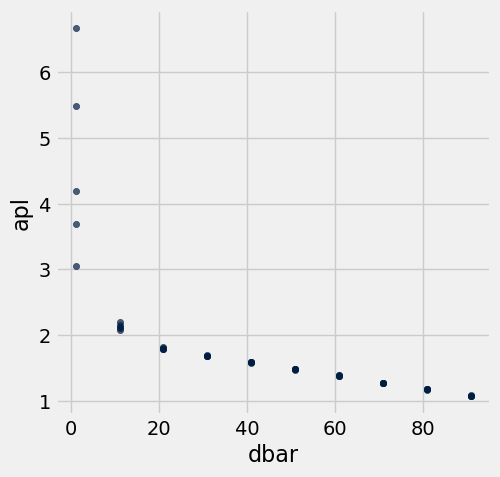

In [34]:
results_apl.scatter('dbar', 'apl')

Finally, let's ask the question: what will happen to the average path length if we fix the average degree, but increase the size of the network?

In [35]:
%%time
## NB: takes about 30 sec
num_repetitions = 5
dbar = 10
n_vals = np.repeat(np.arange(100, 500, 10), num_repetitions)
apl_results = make_array()

for current_n in n_vals:
    sim_network = gen_er_by_avg_degree(n=current_n, dbar=dbar)
    gc = get_biggest_component(sim_network)
    apl_results = np.append(apl_results, nx.average_shortest_path_length(gc))
    
results_apl_n = Table().with_columns([
        'n', n_vals,
        'apl', apl_results
    ])

CPU times: user 17.3 s, sys: 25.5 ms, total: 17.3 s
Wall time: 17.3 s


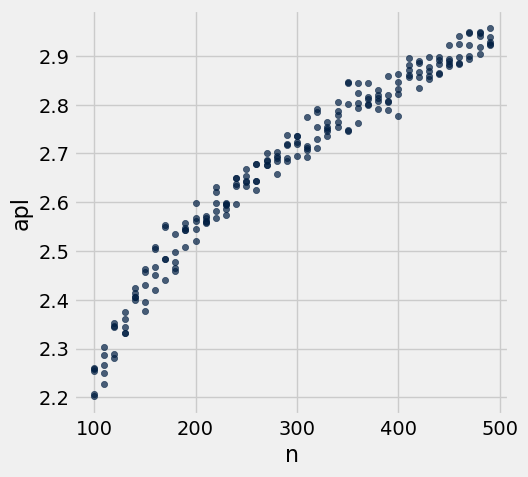

In [36]:
results_apl_n.scatter('n', 'apl')